# Pólya's urn experiment

### I. The basic Pólya's urn model
###### 1. Model
In the Pólya urn model, we consider initially an urn containing $a$ white and $b$ black objects. The experiment then consists in repeating $n$ times the following step: picking up and observing a random object from the urn, placing it back, and adding a *new* object of the same color in the urn.


###### 2. Notations
- $a$ and $b$, the initial numbers of, respectively, white and black objects in the urn.
- $n$, the number of steps in the experiment.
- $\mathcal{P}(a, b, n)$ denotes a Polya urn experiment of initial parametes $a$, $b$ and $n$.
- $W_k$ and $B_k$, the number of, respectively, white and black objects in the urn after $k$ steps.
- $T_k = W_k + B_k = a + b + k$, the total number of objects in the urn after $k$ steps
- $o_k$ the object picked at step $k$, and $O_k$ the event associated to its color, i.e., $O_k = \begin{cases} 0,& \mbox{if } o_k \mbox{ is white}\\
1,& \mbox{if } o_k \mbox{ is black}
\end{cases}$.

###### 3. Toy example
Let us first consider the case of one Pólya experiment $\mathcal{P}(a, b, n)$. The code following snippet plots the evolution of the distributions of black and white objects in the urn through time.

In [13]:
# Imports
from time import sleep
from random import randint
from math import log10, ceil
import matplotlib.pyplot as plt
import numpy as np
colors = ["#727272", "#f1595f", "#79c36a", "#599ad3", "#f9a65a", "#9e66ab", "#cd7058", "#d77fb3"]

<IPython.core.display.Javascript object>


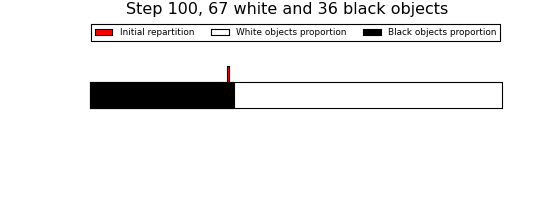

In [7]:
# Require matplotlib > 1.4.3 
% matplotlib nbagg
plt.rcParams['figure.figsize'] = 7, 2.5

def animate_polya(a, b, n):
    """
        Plot an animation representing the progress of a Polya's experiment
        for ``n`` steps and initially ``a`` white and ``b`` black objects
    """
    N = a + b
    bk = b
    fmt = int(ceil(log10(N)))
    urn = [0 for _ in xrange(a)] + [1 for _ in xrange(b)] + [-1 for _ in xrange(n)] 
    _ = plt.gca().add_patch(plt.Rectangle((0.045 + 0.95 * bk / float(N), 0.61),  0.005, 0.1, 
                                          fc='r', label="Initial repartition"))
    _ = plt.gca().add_patch(plt.Rectangle((0.045, 0.45), 0.95, 0.16, fc='w', ec='k', 
                                          label="White objects proportion"))
    br = plt.gca().add_patch(plt.Rectangle((0.045, 0.45),  0.95 * bk / float(N), 0.16, 
                                           fc='k', label="Black objects proportion"))
    plt.axis('off')
    plt.legend(ncol=3, prop={'size':8})
    plt.ion()
    plt.show()
    for k in xrange(n+1):
        if k > 0:
            pick = urn[randint(0, N - 1)]
            urn[N] = urn[randint(0, N - 1)]
            N += 1
            if pick: bk += 1
        br.set_width(0.95 * bk / float(N))
        plt.title("Step %d, %s white and %s black objects" % 
                  (k, str(N - bk).zfill(fmt), str(bk).zfill(fmt)))
        plt.draw()
        sleep(0.1) 
    plt.ioff()
    
# a = 2, b = 1, 60 steps
animate_polya(2, 1, 100)

###### 4. Theoretical expression of the distribution
Let us compute the **probability of having picked $k$ black objects after $n \geq k$ steps** of the experiment. The computation relies on the probability chain rule, and on the fact that the order in which the balls are picked up does not influence the total probability. In fact, 

\begin{align*}
\mathbb{P} (B_n = b + k) &= \sum_{\substack{\mathbf{i} \in \{0, 1\}^n \\ s.t. \sum i_p = k}} \mathbb{P}(O_1 = i_1, \dots O_{n} = i_n)
\end{align*}

If we actually write out the probability of $\mathbb{P}(O_1 = i_1, \dots O_{n} = i_n)$, we observe it does not depend on the order on which the balls are picked, as it is written as a product for which we can easily shuffle around the order of the numerators and denominators (see for instance the case of $\mathbb{P}(O_{1\dots k} 
= 1, O_{k+1 \dots n} = 0)$ in the following equations).

Therefore, we can write:
\begin{align*}
\mathbb{P} (B_n = b + k) &= \binom{n}{k} \mathbb{P}(O_1 = 1, \dots, O_k = 1, O_{k+1} = 0 \dots O_{n} = 0)\\
&=  \binom{n}{k} \mathbb{P}(O_1 = 1)  \dots  \mathbb{P}(O_k = 1\ |\ O_{1\dots k-1} = 1) \mathbb{P}(O_{k+1} = 0\ |\ O_{1\dots k} = 1) \\ &\dots \mathbb{P}(O_{n} = 0\ |\ O_{1\dots k} = 1, O_{k+1\dots n} = 0)\\
&= \binom{n}{k} \prod_{p=0}^{k-1} \frac{b + p}{a+ b + p}  \prod_{q=0}^{n-k-1} \frac{a + q}{a+ b + q} = \binom{n}{k} \frac{(b+k-1)! (a+b-1)! (a+n-k-1)!}{(b-1)! (a-1)! (a+b+n-1)!} &(1)\\
\mathbb{P} (B_n = b + k) &= \frac{\binom{n}{k} \binom{a+b}{b}}{\binom{a+b+n-1}{b+k}}  \frac{ab}{(a+b)(b+k)}
\end{align*}

   Consequently, we can compute the probability of **picking a black ball at step $k$**, independently of the state of the urn at time $k - 1$:
\begin{align*}
\mathbb{P} (O_k = 1) &= \sum_{j=0}^k \mathbb{P}(O_k = 1\ |\ B_{k-1} = b + j)\ \mathbb{P}(B_{k-1} = b + j) \\
&= \frac{ab\binom{a+b}{b}}{(a+b+k)(a+b)} \underbrace{\sum_{j=0}^k \frac{\binom{k}{j}}{\binom{a+b+k-1}{b+j}}}_{f(k, a, b)}
\end{align*}


To obtain a simpler expression, we use Pascal's triangle on the numerator and observe that:
\begin{align*}
f(k, a, b) &= \sum_{j=0}^k \frac{\binom{k}{j}}{\binom{a+b+k-1}{b+j}} = \frac{1}{\binom{a+b+k-1}{b}} + \frac{1}{\binom{a+b+k-1}{b+k}} + \sum_{j=1}^{k-1} \frac{\binom{k-1}{j}}{\binom{a+b+k-1}{b+j}} + \sum_{j=1}^{k-1} \frac{\binom{k-1}{j-1}}{\binom{a+b+k-1}{b+j}}\\
&= \sum_{j=0}^{k-1} \frac{\binom{k-1}{j}}{\binom{a+b+k-1}{b+j}} + \sum_{j=0}^{k-1} \frac{\binom{k-1}{j}}{\binom{a+b+k-1}{b+j+1}}\\
f(k, a, b) &= f(k-1, a+1, b) + f(k-1, a, b+1)
\end{align*}

By extending the relation, one can infer and finally prove by induction over $k$, that $f(k, a, b) = \frac{a+b+k}{(a+b) \binom{a+b-1}{b}}$, thus:
\begin{align*}
\mathbb{P} (O_k = 1) &= \frac{b}{a+b}
\end{align*}

In particular, for the case where $a = 1$ and $b = 1$, we have 
$\mathbb{P} (B_n = k + 1) = \frac{1}{n + 1}$ and $\mathbb{P} (O_k = 1) = \frac{b}{a+b} = \frac{1}{2}$, i.e. all urn configurations are equiprobable.

###### 5. Asymptotical behaviour
Let us study the behaviour of the color repartition in the urn when the number of repeats increases. For simplicity, we introduce the random variable $Y_n = \frac{B_n}{a + b + n}$.

*5a. Expected value*

A first result that can be easily obtained from the previous analysis is the following:
\begin{align*}
\mathbb{E}(Y_n) &=  \sum_{k=0}^n \frac{b+k}{a+b+n} \mathbb{P}(B_n = b+k) =  \sum_{k=0}^n \mathbb{P}(O_n = 1\ |\ B_{n-1} = b + k) \mathbb{P}(B_n = b+k)\\
\mathbb{E}(Y_n) &= \mathbb{P}(O_n = 1) = \frac{b}{a+b}
\end{align*}

We can also observe this result experimentally

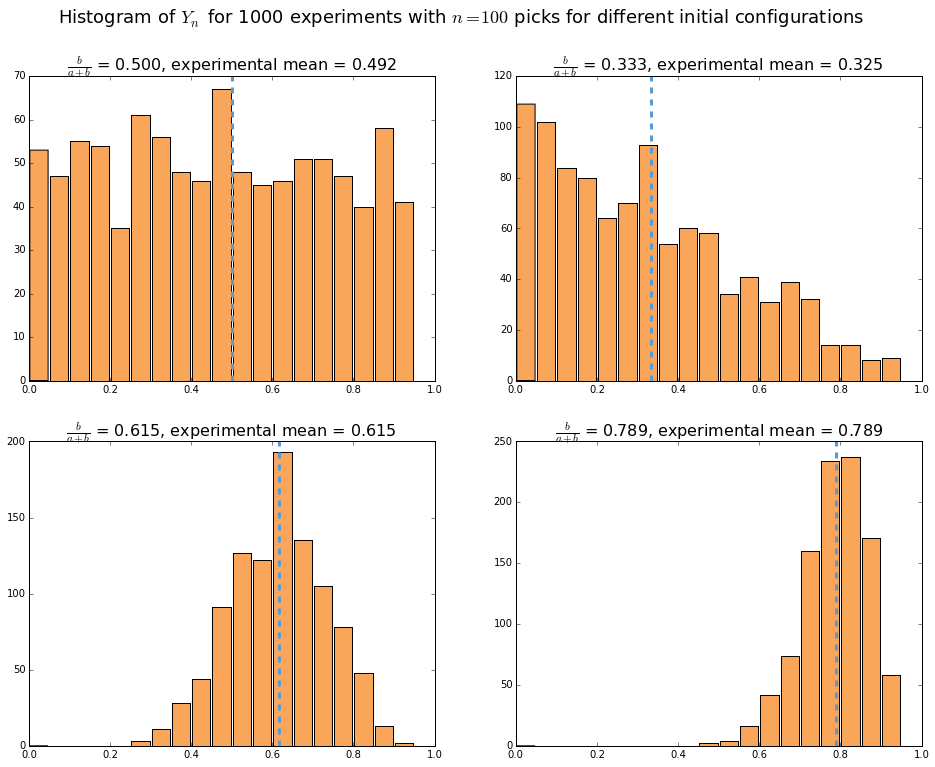

In [45]:
% matplotlib inline
def run_polya(a, b, n):
    urn = [0 for _ in xrange(a)] + [1 for _ in xrange(b)] + [-1 for _ in xrange(n)]
    N = a + b

    for _ in xrange(n):
        urn[N] = urn[randint(0, N - 1)]
        N += 1
        
    return urn


plt.rcParams['figure.figsize'] = (16.0, 12)
f, axes = plt.subplots(2, 2)
n, epoch = 100, 1000
for j, (a, b) in enumerate([(1, 1), (2, 1), (5, 8), (4, 15)]):
    binsize = 0.05
    data = [0] * epoch
    for i in xrange(epoch):
        data[i] = run_polya(a, b, n).count(1) / float(a + b + n)
    axes.flatten()[j].hist(data, bins=np.arange(0, 1, binsize), color=colors[4], rwidth=0.9)
    axes.flatten()[j].set_title(r"$\frac{b}{a + b}$ = %.3f, experimental mean = %.3f" % 
                                (b/float(a+b), np.mean(data)), fontsize=16)
    axes.flatten()[j].axvline(b/float(a+b), color=colors[3], linewidth=3, linestyle="dashed")
    
f.suptitle(r"Histogram of $Y_n$ for %d experiments with $n = %d$ picks for different initial configurations" % 
           (epoch, n), fontsize=18)
plt.show()

*5b. Convergence*


### II. The generalized Polya's urn model
###### 1. Model
The Polya urn model starts with in an initial urn containing $a$ white and $b$ black objects.  The experiment then consists in repeating $n$ times the following step: picking up and observing a random object from the urn, placing it back, and adding a *new* object of the same color in the urn.


###### 1. Matrix


###### 1. Series generatrice

Source